In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = load_breast_cancer()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# 1. 데이터 이해하기

In [2]:
# x,y 나누기
df_data = df.data
df_label = df.target

In [3]:
# shape 보기
print(df_data.shape,df_label.shape)

(569, 30) (569,)


In [4]:
# x 항목 보기
df.feature_names           

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# y 항목 보기
df.target_names  

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# describe
df.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [21]:
df_dataframe = pd.DataFrame(data=df_data, columns=df.feature_names)
df_dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 2. train, test 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_data, 
                                                    df_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# 3. 다양한 모델로 학습시켜보기

In [9]:
# 1) Decision Tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 

print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [10]:
# 2) Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32) 
random_forest.fit(X_train, y_train) 
y_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [11]:
# 3) SVM
from sklearn import svm


svm_model = svm.SVC()
svm_model.fit(X_train, y_train) 
y_pred = svm_model.predict(X_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [12]:
# 4) SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier() 
sgd_model.fit(X_train, y_train) 
y_pred = sgd_model.predict(X_test) 

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.86      1.00      0.92        74

    accuracy                           0.89       114
   macro avg       0.93      0.85      0.87       114
weighted avg       0.91      0.89      0.89       114



In [13]:
# 5) Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=5000)

logistic_model.fit(X_train, y_train) 
y_pred = logistic_model.predict(X_test) 

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# 4. 모델을 평가해 보기

[Accuracy]  
Decision Tree : 0.91              
Random Forest : 1.00              
SVM : 0.90              
SGD Classifier : 0.54    
Logistic Regression : 0.94      

유방암은 양성(0)이 맞는데 아니라고(1) 하는 경우, 즉 FP, precision 더 민감할듯.

random forest는 accuracy도 1이고, FP도 모두 1이므로 제일 적합.


# 5. 회고

오늘 세 가지 dataset practice 후에,

어떤식의 자료가 어떤 모델에 적합한지를 결정하는 것.
train, test set 분류시 얼마의 비율로 나눌지 결정하는 것.
random_rate를 얼마로 할지 결정하는 것.

이 세 가지를 결정하는 것이 모델의 정확도를 개선하는데 큰 영향을 미친다는 사실을 알았다.
결국 제일 중요한 일은 사람이 해야하나보다.
이런 요소들까지도 최적화 할 수 있는 또다른 모델이 있을 수도 있겠다는 생각이 들었다.

더불어 유방암 데이터 같은 경우에는
label 인덱스가 0이 양성, 1이 음성으로 보통 1이 양성이라고 생각하는 상식의 섣부른 판단의 오류가.. 범해질 뻔 하였다.
실제로 lms의 코로나 예제의 경우, 1이 양성, 0이 음성이었다.
즉, 유방암은 양성(0)인데 음성(1)으로 판단한 FP, precision이 critical 했고,
    코로나는 양성(1)인데 음성(0)으로 판단한 FN, recall이 critical했다.
조별 토론을 통해 의료계 데이터라고 해서 꼭 recall이 critical하다는 판단도 위험하다는 사실을 알았다.
    
당연히 양성이 1이라고 생각해서 처음엔 FN의 수치가 1인 모델을 찾다가,
뭔가 꼬이는 듯한 느낌을 받고 다시 손으로 매트릭스를 그린 후에야 이해가 되었다.
컴퓨터는 상식이 없구나.. 인덱스만 있구나.. ^^ 

# 심화학습 (Seaborn)

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

df_dataframe.corr()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

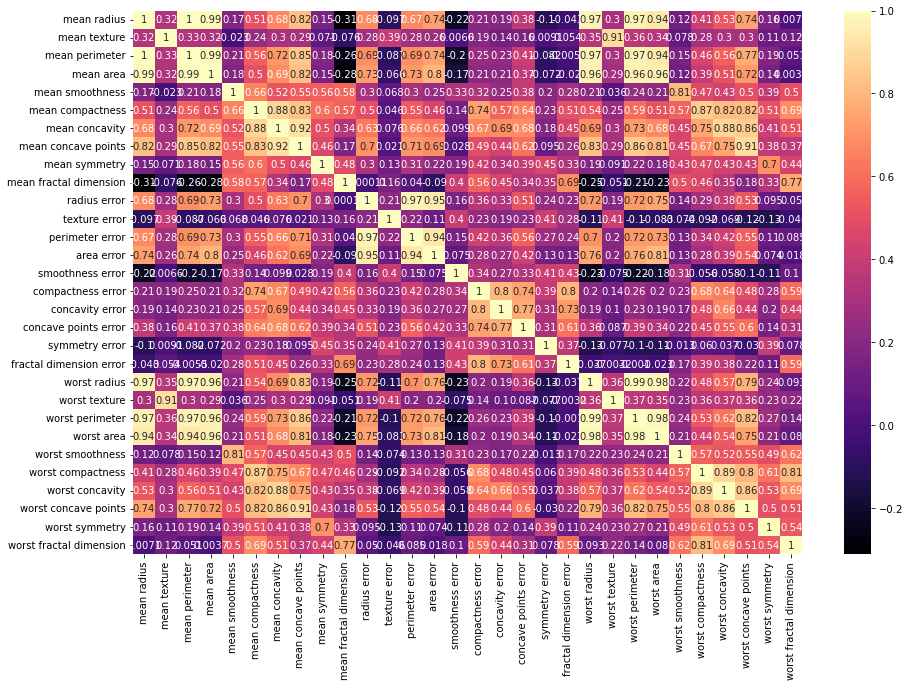

In [24]:
df_data_corr = df_dataframe.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_data_corr, annot = True, cmap = 'magma')

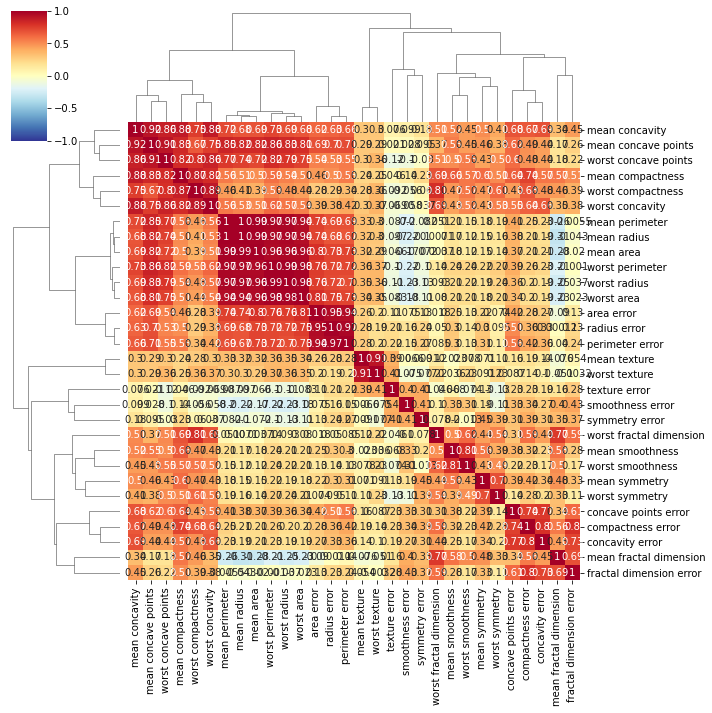

In [25]:
sns.clustermap(df_data_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

C:\Users\Soonju\AppData\Local\Temp\ipykernel_31072\3054149092.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_data_corr, dtype=np.bool)


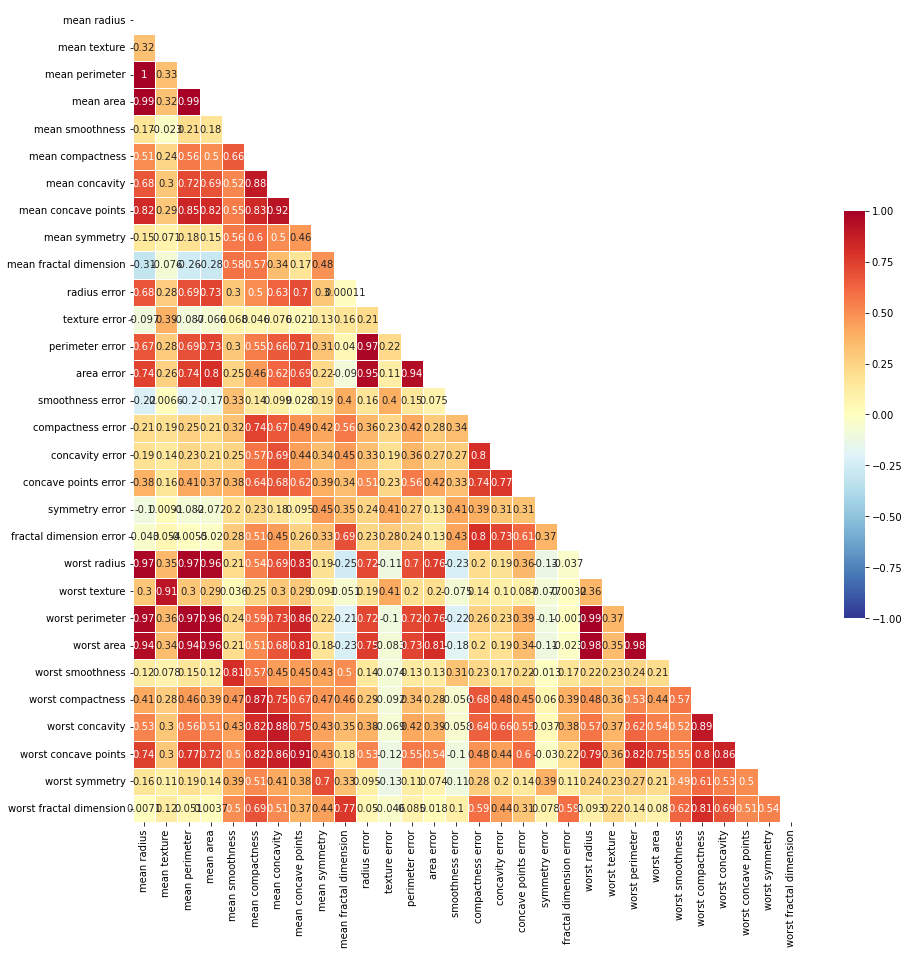

In [26]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_data_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

# 어떤 feature가 암의 악성/양성과 가장 관련이 있을까?

In [53]:
# X에 y 합쳐서 상관관계 보기

df_label.shape # (569,)
df_label = df_label.reshape(569,-1)

df_labelframe = pd.DataFrame(data=df_label)
df_labelframe.rename(columns={0:'n/p'}, inplace = True)
df_labelframe

df_allframe = pd.concat([df_dataframe,df_labelframe], axis=1)
df_allframe


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,n/p
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


C:\Users\Soonju\AppData\Local\Temp\ipykernel_31072\1340907709.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_allframe.corr(), dtype=np.bool)


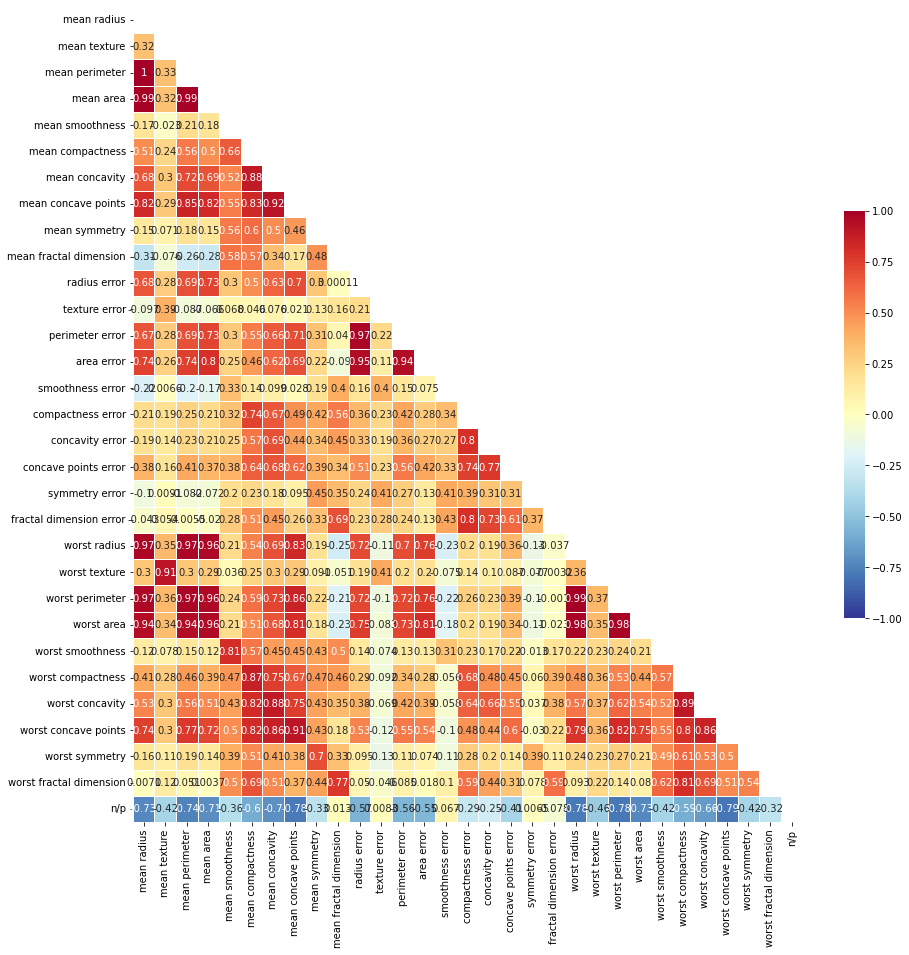

In [90]:
fig, ax = plt.subplots( figsize=(15,15) )

mask = np.zeros_like(df_allframe.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_allframe.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

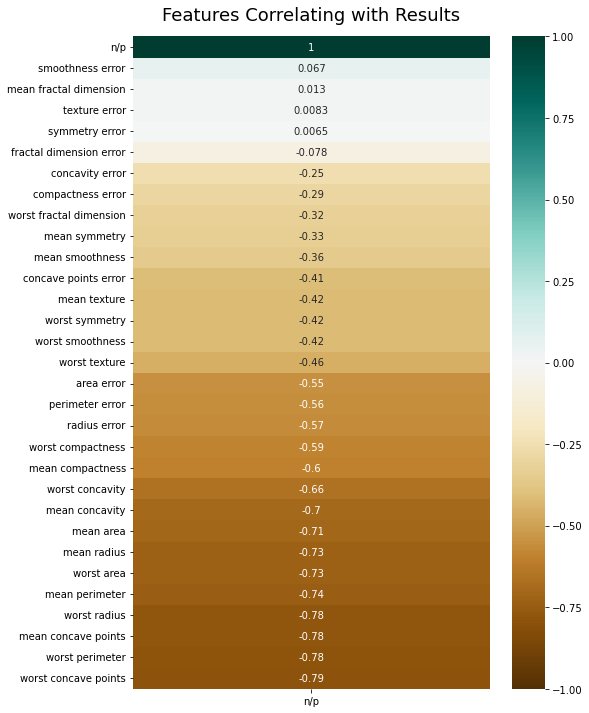

In [95]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_allframe.corr()[['n/p']].sort_values(by='n/p',ascending=False), vmin=-1, vmax=1,annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Results', fontdict={'fontsize':18}, pad=16);

# 6. 심화결론

Smoothness error와 악성 label은 정비례의 상관관계를 가진 것으로 분석되었다. worst symmetry, mean texture 등등도 음의 상관관계를 가진 것으로 분석되었지만, smoothness error외 다른 것들은 모두 병원에서 진단을 받아야 하는 결과치였다.

병원에 가지 않아도 생활하면서 암의 징조를 알 수 있을만한 증상들이 궁금했었는데,
흔히 얘기되는 통증이나 피로함, 체중감소와 같은 지표들은 눈에 보이는 수치가 없어서 확실하다는 느낌이 덜했던게 사실이다. 이렇게 수치로 보고 시각화하고 나니 촉진이 중요하다는 말에 동의할 수 있었다.

하지만 softness error는 tissue의 이상으로 인해 numeric하게 측정된 값이 있었다. 한편으로는 촉감의 부분이라 수학적으로 측정이 불가하다고 생각했는데, 이렇게 측정이 된 데이터가 있었다는 점. 그리고 EDA 만으로도 이 데이터가 가진 의미를 발견한 것 같아 흥미로웠다. 뭔가 데이터를 이리저리 분석하는것 만으로도 발명만큼 거대한 '발견'을 해내는 느낌이다. 


# 7. 유의할점

target data의 index 번호가 one-hot-encording의 value가 되는 것은 아니라는 점. 이 문제도 인덱스 번호대로 악성이 0, 양성이 1이라는 생각에 갇혀있었고, 결국 찾아낸 것은discription상에 2 classes로 나눠져있다고만 나와있을 뿐, 결론적으로는 악성이 1이라는 것이었다. 데이터를 받으면 기계처럼 분석부터 할 것이 아니라 데이터에 대해 더 깊이 이해하고난 후에 데이터를 만져야된다는 생각이 들었다. 그렇지않으면, 편견이나 생각의 오류로 데이터분석의 결론이 180도 달라질 수도 있을 듯 하다.